

# Project: Investigate a Dataset - [ tmdb-movies.csv ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. 
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Questions for Analysis
--Which actors has the most popularity in movies ?                                                                           
-- top movies depending on different factors                                                                           
---Whice Movies had most and least Revenue ?

In [25]:
# importing statements for all of the packages i will use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import seaborn as sns


In [26]:
# Upgrading pandas so that i can use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

in this step we will load and read the dataset ,                                                                     
use some pandas functions to know the dataset well ,                                                                   
and also to check if it has NaN values , duplicated raws etc..


In [27]:
#loading the data we will use

df = pd.read_csv('tmdb-movies.csv')

#printng the first 5 raws of the dataset

print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [28]:
#using info and shape functions to know more about the dataset

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

In [29]:
#checking if the dataset has duplicated values or not and find how many if there is 

sum(df.duplicated())

1

In [30]:
#using disribe function to check mean ,max , min etc..

print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79666e1470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f79642aa4a8>]], dtype=object)

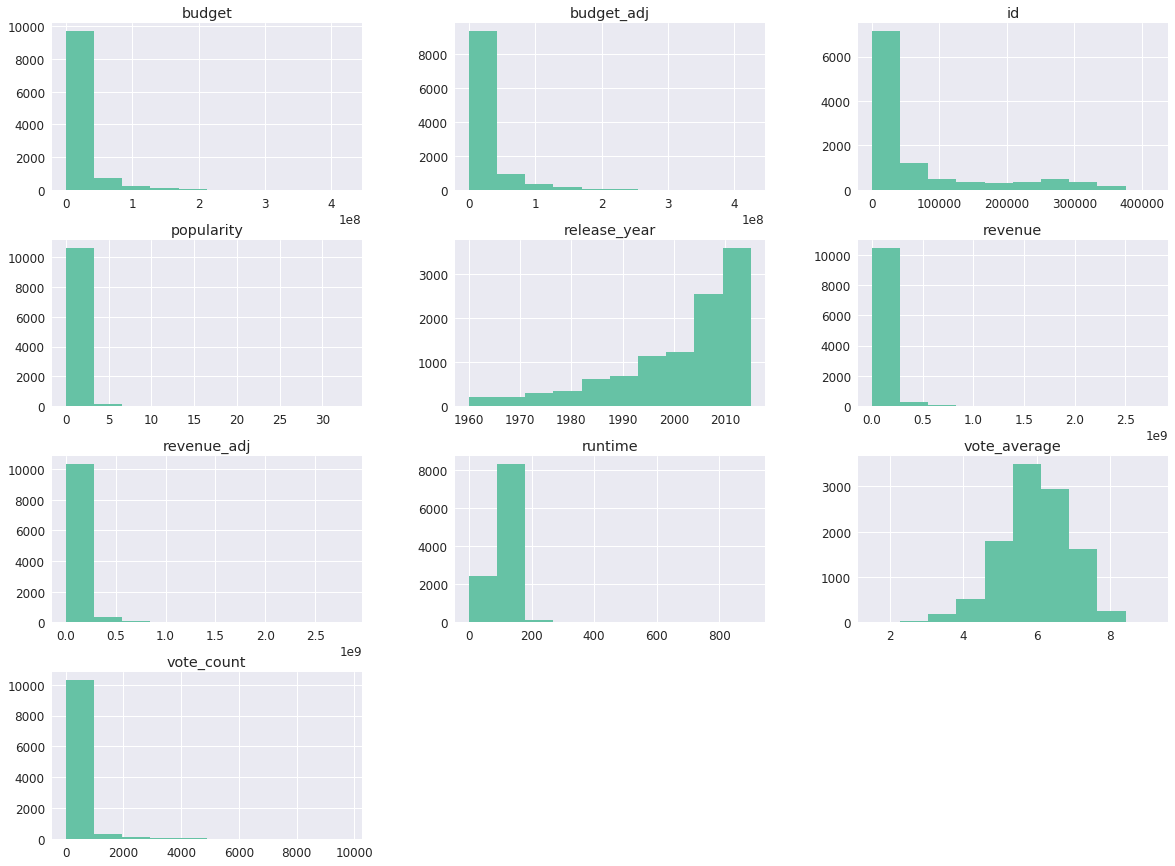

In [31]:
#using histogram to show frequency distributions

df.hist(figsize=(20,15))

In [32]:
#checking the sum of Nan values for each column

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [33]:
#checking the sum of Nan values for the entire dataset

df.isnull().sum().sum()

13434

### Data wrangling insigths


After wrangling the dataset and using many functions we noticed the following :-

1- it has 13434 null values in all the columns must be handeld.

2- it has 1 duplicated value must be handeld.

3- Many rows seems to have multiple values separated by '|' must be handeld.

4- the .describe() method, as well as the histogramms, indicate that many columns, especially budget and revenue,
    contain many "0" in their columns. 
    
in the data cleaning process will walk throug all of the mentioned problems and solve them.


## Data Cleaning

 

After discussing the structure of the data and any problems that need to be cleaned,                                             we will perform those cleaning steps in this section.

In [34]:
#here, we replace all the NaN values in columns ('runtime', 'budget' , 'budget_adj' , 'revenue_adj' , 'revenue')
#by zero and then we delete them using dropna function.


df['runtime'].replace(0, np.NAN, inplace=True)

df['budget'].replace(0, np.NAN, inplace=True)

df['budget_adj'].replace(0, np.NAN, inplace=True)

df['revenue_adj'].replace(0, np.NAN, inplace=True)

df['revenue'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [35]:
# here, we Seperate columns with several values, split by an '|', into as many columns as needed.


df_prod = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

df_gener = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))

df_key = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))

df_dir = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))

df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))


In [36]:
#here, we check if spliting the columns was done correctly.

print(df_prod.head())
print("---"* 15)

print(df_gener.head())
print("---"* 15)

print(df_key.head())
print("---"* 15)

print(df_dir.head())
print("---"* 15)

print(df_cast.head())
print("---"* 15)


      production_companies_1      production_companies_2  \
0          Universal Studios        Amblin Entertainment   
1  Village Roadshow Pictures  Kennedy Miller Productions   
2       Summit Entertainment            Mandeville Films   
3                  Lucasfilm       Truenorth Productions   
4         Universal Pictures               Original Film   

    production_companies_3   production_companies_4 production_companies_5  
0       Legendary Pictures  Fuji Television Network                 Dentsu  
1                     None                     None                   None  
2  Red Wagon Entertainment                  NeoReel                   None  
3                Bad Robot                     None                   None  
4     Media Rights Capital                   Dentsu         One Race Films  
---------------------------------------------
    genres_1         genres_2         genres_3  genres_4 genres_5
0     Action        Adventure  Science Fiction  Thriller     None

In [37]:
#here, we delete the duplicated values.

df.drop_duplicates(keep ='first', inplace=True)


### Review data cleaning  

In [38]:
#here, we reviw null values. 

df.isnull().sum().sum()

0

In [39]:
#here, we reviw duplicated values.

sum(df.duplicated())

0

In [40]:
#here, we review the shape of thedataset.

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null object
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-nu

(1287, 21)

<a id='eda'></a>
# Exploratory Data Analysis




## Research Question 1 (Which actors has the most popularity in movies ?)

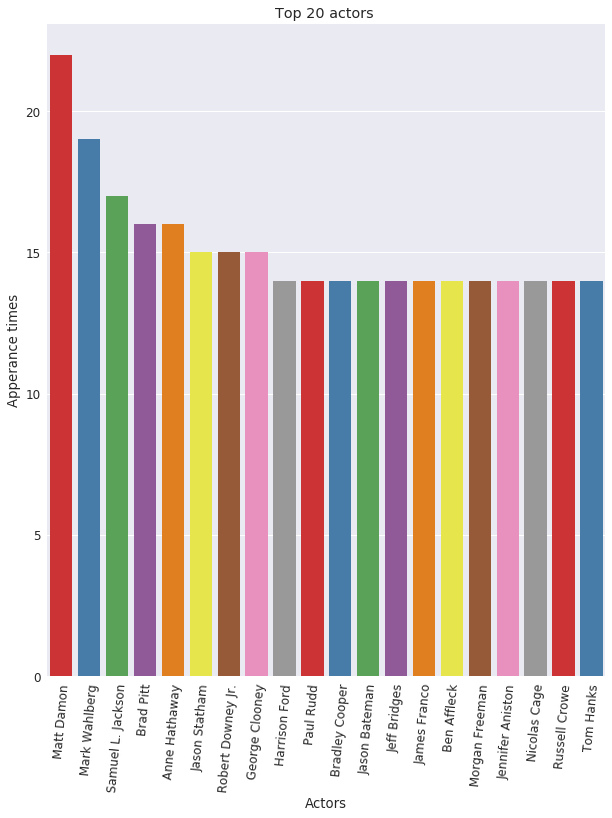

In [41]:
#here, we Create a dictionary for the cast, and how many times each actor casted for movies

actor_dict = {}

actors = df["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #here, we check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #here, we trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)



x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(10,12)}, font_scale=1.2)
ax = sns.barplot(x_axis, y_axis, palette="Set1")


#here, we rotate x-axis' text

for item in ax.get_xticklabels():
    item.set_rotation(85)
    

    
    
#here, we set labels and title for the figure.
    
ax.set(xlabel='Actors', ylabel='Apperance times', title = 'Top 20 actors ')
plt.show()

from the figure above we see that the top 5 actors with the biggest number of appearances are as follows:-                   
1-Matt Damon                                                                                              
2-Mark Wahlberg                                                                                                   
3-Samuel L.jackson                                                                                          
4-Brad pitt                                                                                                        
5-Anne Hathaway




## Research Question 2  (Top movies depending on different factors )

### 1 - Top  movies according to their revenue 

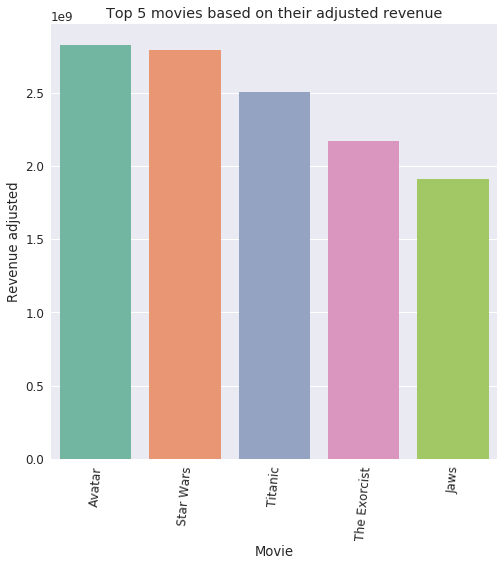

In [50]:
revenue_dict = {}

#here, we fetch different columns with 2 different ways of code

movies_and_revenue = df[["original_title", "revenue_adj"]]

movies_and_budget = df[['original_title','budget_adj']]

movies_and_popularity = df[['original_title','popularity']]

movies_and_votes= df[['original_title','vote_average']]


#here, we set the size of the figure and the font size and choose palette of coloures.

sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.2 ,palette="Set2" )



ax = sns.barplot(
    
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(5).original_title, 
    
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(5).revenue_adj)



#here, we rotate x-axis' text so it appears well.

for item in ax.get_xticklabels():
    item.set_rotation(85)
    

    
#here, we set labels and title for the figure.

ax.set(xlabel='Movie', ylabel='Revenue adjusted', title = 'Top 5 movies based on their adjusted revenue')
plt.show()

from the figure above we see that the top 5 movies based on their adjusted revenue  are as follows:-                   
1-Avatar                                                                                              
2-Star Wars                                                                                                  
3-Titanic                                                                                         
4-The Exorcist                                                                                                       
5-Jaws

### 2- Top Movies According to their popularity 

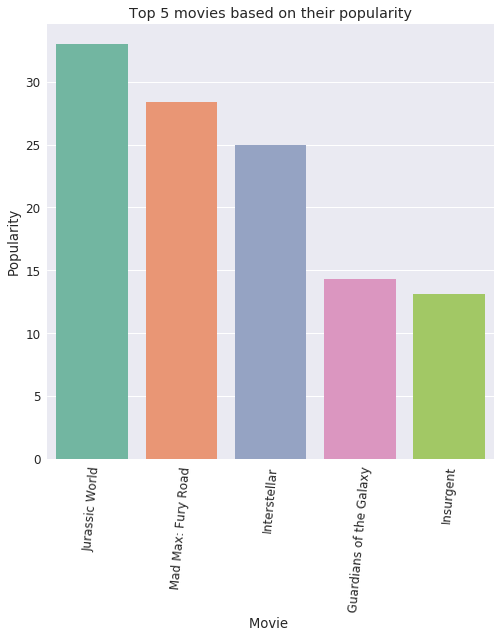

In [51]:
#here, we set the size of the figure and the font size and choose palette of coloures.

sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.2 ,palette="Set2" )




ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(5).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(5).popularity)



#here, we rotate x-axis' text so it appears well.

for item in ax.get_xticklabels():
    item.set_rotation(85)
    
    
    
#here, we set labels and title for the figure.

ax.set(xlabel='Movie ', ylabel='Popularity', title = 'Top 5 movies based on their popularity')
plt.show()

From the figure above we see that the top 5 movies based on their adjusted revenue are as follows:-                        
1-Jurassic World                                                                                                     
2-Mad Max: fury Road                                                                                                      
3-interstellar                                                                                                            
4-Guardians of the Galaxy                                                                                             
5-insurgent

## Research Question 3  (Whice Movies had most and least Revenue? ) 

In [47]:
#here, we create a function that can be used to determine the highest and lowest value in a cokumn.


def calculate(column):
    #this for highest earned revenue.
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    
    #this for lowest earned profit.
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #here, wecollect data in one place
    info=pd.concat([high_details, low_details], axis=1)
    print(info)
    
    

#here, we try the function we created to get the highest and lowest revenue.

calculate('revenue_adj')

                                                                   1386  \
id                                                                19995   
imdb_id                                                       tt0499549   
popularity                                                      9.43277   
budget                                                         2.37e+08   
revenue                                                     2.78151e+09   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
homepage                                    http://www.avatarmovie.com/   
director                                                  James Cameron   
tagline                                     Enter the World of Pandora.   
keywords              culture clash|future|space war|space colony|so...   
overview              In the 22nd century, a paraplegic Marine is di...   
runtime                  

In [48]:
#here, we try the same function we created to get the highest and lowest budget.

calculate('budget')

                                                                   2244  \
id                                                                46528   
imdb_id                                                       tt1032751   
popularity                                                      0.25054   
budget                                                         4.25e+08   
revenue                                                     1.10876e+07   
original_title                                        The Warrior's Way   
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
homepage                         http://www.iamrogue.com/thewarriorsway   
director                                                     Sngmoo Lee   
tagline                                         Assassin. Hero. Legend.   
keywords              assassin|small town|revenge|deception|super speed   
overview              An Asian assassin (Dong-gun Jang) is forced to...   
runtime                  

In [49]:
#here, we try the same function we created to get the highest and lowest runtime.
calculate('runtime')

                                                                   4949  \
id                                                                  122   
imdb_id                                                       tt0167260   
popularity                                                      7.12246   
budget                                                          9.4e+07   
revenue                                                     1.11889e+09   
original_title            The Lord of the Rings: The Return of the King   
cast                  Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   
homepage                                  http://www.lordoftherings.net   
director                                                  Peter Jackson   
tagline                                 The eye of the enemy is moving.   
keywords              elves|orcs|middle-earth (tolkien)|based on nov...   
overview              Aragorn is revealed as the heir to the ancient...   
runtime                  

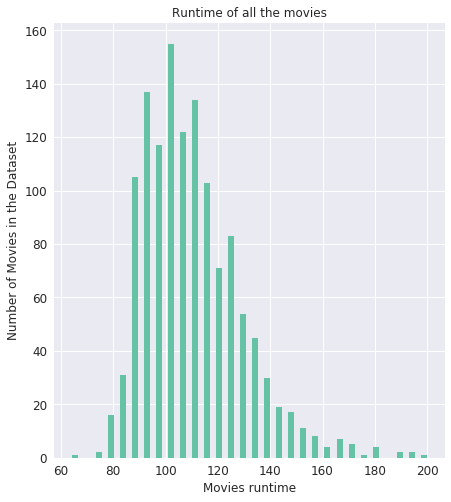

In [54]:
plt.figure(figsize=(7,8))
plt.xlabel('Movies runtime', fontsize = 12)
plt.ylabel('Number of Movies in the Dataset', fontsize=12)
plt.title('Runtime of all the movies', fontsize=12)
plt.hist(df['runtime'], rwidth = 0.5, bins =30)

plt.show()

<a id='conclusions'></a>
## Conclusions





from quistion 1 we noticed that the top 5 actors with the biggest number of appearances are as follows:-
(Matt Damon ,
Mark Wahlberg , 
Samuel L.jackson ,
Brad pitt , 
Anne Hathaway )




from quistion 2 part 1 we noticed that that the top 5 movies based on their adjusted revenue are as follows:-
(Avatar ,
Star Wars , 
Titanic , 
The Exorcist , 
Jaws )


from quistion 2 part 2  we noticed  that the top 5 movies based on their adjusted revenue are as follows:-
(Jurassic World ,
Mad Max: fury Road , 
interstellar , 
Guardians of the Galaxy , 
insurgent )


from the last quistion  we noticed that The numeric columns of "popularity, budget and vote_count" show the highest correlations. One can argue that movies with higher budgets are able to receive higher revenues, nevertheless, the correlation is not on a very high level. Vote_count is indicating that the more people vote for a movie, the higher the revenue is. Most probably, this is not a good indicator for high revenue movies. High revenue movies indicate that they are most commonly directed by Matt Damon, cast Tom Cruise as actor and contain the genre Action.

### Limitations


This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0